In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cubic_potentials as cp
from scipy.integrate import odeint
import importlib as im

In [ ]:
init_pos = [-1,1.5,0.5]
p = 10 ## mbar

mu = 100*(10/p) ## cm^2/Vs at 10 mbar
fAC = 5e3 ## Hz
VAC = 1000 # V
q_sphere = -1e2
sphere_rad = 1.5e-4

im.reload(cp)

traj = cp.track_particle(init_pos, mu, fAC, VAC, q_sphere, sphere_rad, max_t=1, oversamp=20)
title = "P = %d mbar, $f_{AC}$ = %.1f kHz, $V_{AC}$ = %d V,\n $q_{sph}$ = %d $e$, Init. pos = (%.1f,%.1f,%.1f) cm"%(p, fAC/1e3, VAC, q_sphere, *init_pos)
cp.plot3Dtraj(traj, title=title)

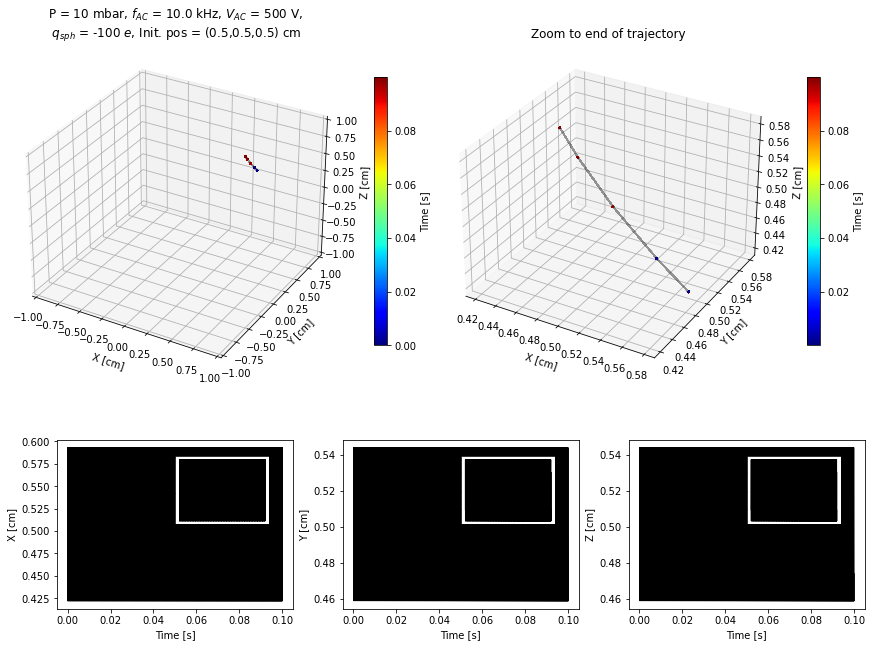

In [ ]:
init_pos = [0.5,0.5,0.5]
p = 10 ## mbar

mu = 100*(10/p) ## cm^2/Vs at 10 mbar
fAC = 10e3 ## Hz
VAC = 500 # V
q_sphere = -1e2
sphere_rad = 1.5e-4

im.reload(cp)

traj = cp.track_particle_odeint(init_pos, mu, fAC, VAC, q_sphere, sphere_rad, max_t=0.1, oversamp=10)
title = "P = %d mbar, $f_{AC}$ = %.1f kHz, $V_{AC}$ = %d V,\n $q_{sph}$ = %d $e$, Init. pos = (%.1f,%.1f,%.1f) cm"%(p, fAC/1e3, VAC, q_sphere, *init_pos)
cp.plot3Dtraj(traj, title=title)

In [ ]:
im.reload(cp)

<module 'cubic_potentials' from '/Users/dcmoore/Library/CloudStorage/GoogleDrive-david.c.moore@yale.edu/My Drive/yale/uspheres/Paul_Trap_MC/cubic_potentials.py'>

In [ ]:
y0 = [1,0]

b = 800

tvec = np.linspace(0,50,500)

alist = [0,] # np.linspace(-1,1,50)
qlist = np.linspace(0,10000,200)

stab_mat_z = np.zeros(len(qlist))
stab_mat_r = np.zeros(len(qlist))

for aidx, a in enumerate(alist):
    for qidx, q in enumerate(qlist):
        if qidx % 50 == 0: print(qidx)

        sol = odeint(cp.mathieu, y0, tvec, args=(b,a,q))
        stab_mat_z[qidx] = sol[-1,0]

        sol = odeint(cp.mathieu, y0, tvec, args=(b,-0.5*a,-0.5*q))
        stab_mat_r[qidx] = sol[-1,0]

is_stab = np.logical_and(np.abs(stab_mat_z) < 1, np.abs(stab_mat_r) < 1)
last_stab = np.where(is_stab[0])[0][-1]

print("Max stab is q = ", qlist[last_stab])

0
50
100
150


IndexError: index -1 is out of bounds for axis 0 with size 0

(-0.1, 10.0)

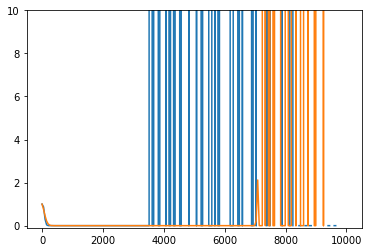

In [ ]:
plt.figure()
plt.plot(qlist, np.abs(stab_mat_z))
plt.plot(qlist, np.abs(stab_mat_r))
plt.ylim([-0.1,10])

In [ ]:
print(is_stab)
print(qlist[is_stab[0]])

[[False  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True False  True  True False  True False  True  True  True
   True False  True  True  True  True  True  True False False  True  True
   True  True False  True False  True False  True  True  True  True False
   True  True  True  True False  True  True  True  True  True False  True
   True False False  True  True  True  True False  True  True  True  True
  False  True  True False False  True  True False  True  True False  True
  False  True  True  True False  True  True False  True False  True False
   True  True  True False False False 

Params are q=668.72, b=1416.5, k=-0.0


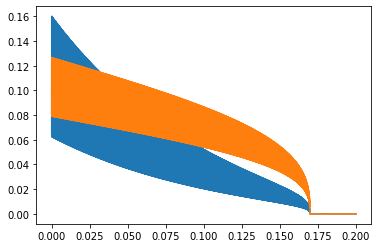

In [64]:
#im.reload(cp)
max_t = 0.2

omega = 2*np.pi*10e3 ## Hz
Vac = 300 ## V
Vdc = 0 ## V
q_sphere = -100 # electrons

b = 8.9e7/omega ## coeff in Hz
q = 4*2.2e9 * Vac/omega**2 ## coeff in Hz^2/V
a = 2*q*Vdc/Vac
k = 2.6e3 * q_sphere/omega**2 ## coeff in cm^3 * Hz^2/e

print("Params are q=%.2f, b=%.1f, k=%.1f"%(q,b,k))

max_x = max_t * omega/2
xvec = np.arange(0,max_x,0.5)  #normalized time

y0 = [0.1,0, 0.1, 0] # r v_r, z, v_z

sol_rz = odeint(cp.mathieu, y0, xvec, args=(b,a,q,k))

tvec = xvec/(omega/2)

plt.figure()
plt.plot(tvec, sol_rz[:,0])
plt.plot(tvec, sol_rz[:,2])
#plt.gca().set_yscale('log')
#plt.ylim(1e-4,1)

